In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [2]:
fairgp_files = [
    ('../results/ICML/adult/gpyt2500_dempar_tuning_race.csv', ''),
    ('../results/ICML/adult/gpyt2500_dempar_tuning_sex.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"$PR_t={num}${with_s}", not in_True

fairgp = ph.parse_all(fairgp_files, label_change)

In [3]:
fairgp = ph.choose_entries(fairgp, [0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

In [8]:
def manual_entry(plot, x, y, label):
    plot.plot(x, y, '*', label=label, c='k',#c="#7f7f7f",
              markersize=8)

In [4]:
def acc_vs_di(plot, legend, *data):
    ms = 4
    xaxis = ('DIbinary', '$PR_{s=0}\\,/\\,PR_{s=1}$')
    yaxis = ('accuracy', 'accuracy')
    legends = []
    startindex = 0

    plot.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
    for data_structure in data:
        legends += [ph.scatter(plot, data_structure, xaxis, yaxis, legend=legend, startindex=startindex, markersize=ms)]
        startindex += len(data_structure.entries) // 2
    if legend is not None:
        return legends

In [5]:
def pr0_vs_pr1(plot, legend, sens, *data):
    ms = 4
    xaxis = (f'0-PR-{sens}', '$PR_{s=0}$')
    yaxis = (f'1-PR-{sens}', '$PR_{s=1}$')
    legends = []
    startindex = 0

    plot.plot([0., 1.], [0., 1.], 'k--', label="perfect fairness")
    for data_structure in data:
        legends += [ph.scatter(plot, data_structure, xaxis, yaxis, legend=legend, startindex=startindex, markersize=ms)]
        startindex += len(data_structure.entries) // 2
    if legend is not None:
        return legends

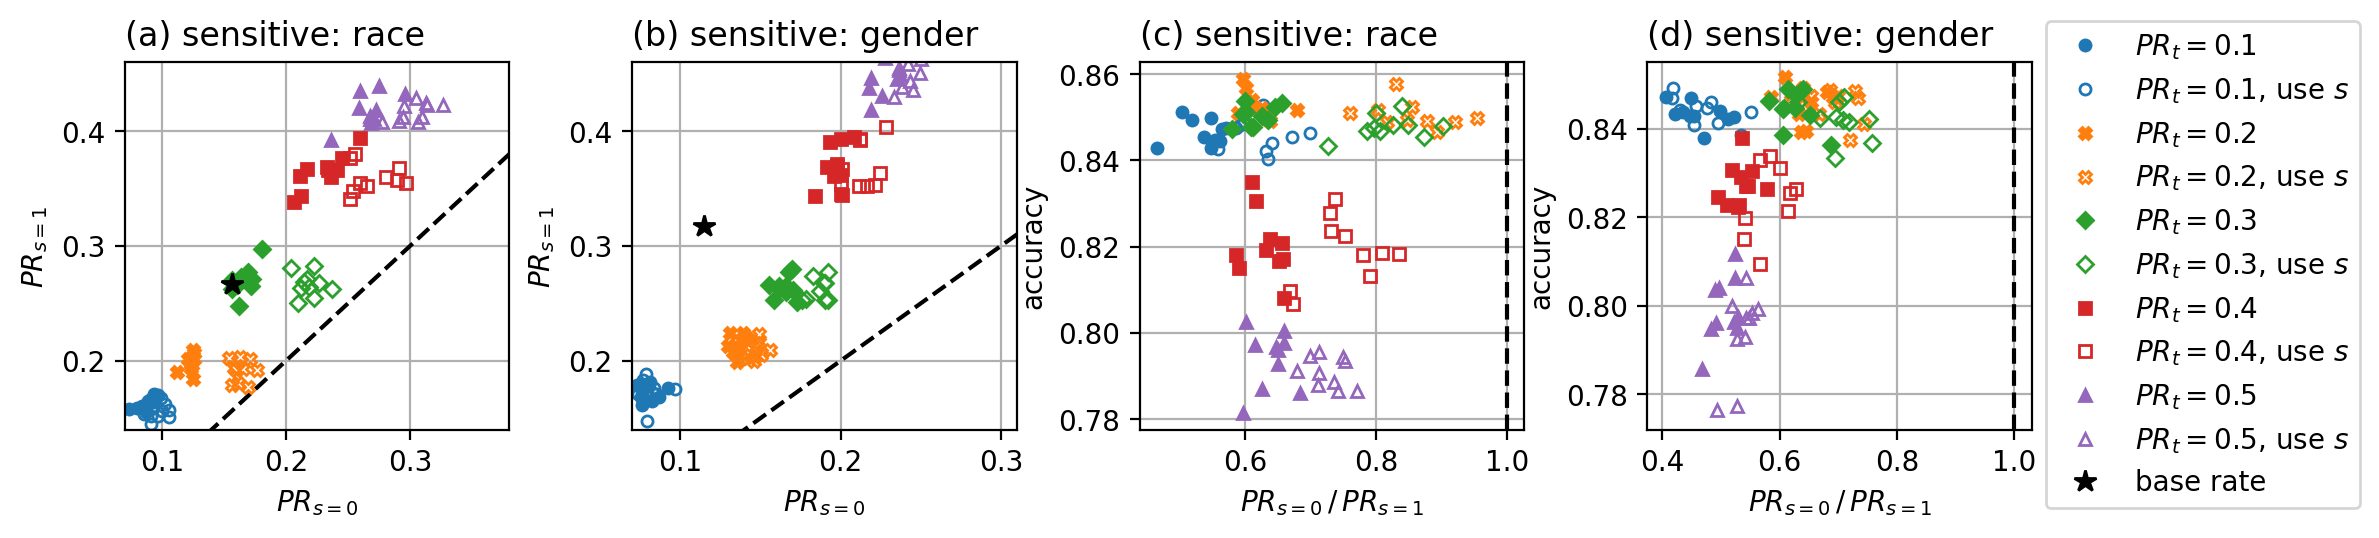

In [28]:
fig, plots = plt.subplots(ncols=4, figsize=(12, 2.2), dpi=200)

pr0_vs_pr1(plots[0], None, 'race', fairgp[0])
manual_entry(plots[0], 0.1561938958707361, 0.26669745425157304, "base rate")
plots[0].set_title("(a) sensitive: race", loc='left')
plots[0].set_ylim(0.14, 0.46)
plots[0].set_xlim(0.07, 0.38)
legends = pr0_vs_pr1(plots[1], None, 'sex', fairgp[1])
manual_entry(plots[1], 0.11451785988042312, 0.31711446448288555, "base rate")
plots[1].set_title("(b) sensitive: gender", loc='left')
plots[1].set_ylim(0.14, 0.46)
plots[1].set_xlim(0.07, 0.31)


acc_vs_di(plots[2], None, fairgp[0])
plots[2].set_title("(c) sensitive: race", loc='left')
# plots[0].set_ylim(0.14, 0.44)
# plots[0].set_xlim(0.07, 0.38)
acc_vs_di(plots[3], None, fairgp[1])
manual_entry(plots[3], 2.0, 2.0, "base rate")  # a dummy entry that's only for the legend
plots[3].set_title("(d) sensitive: gender", loc='left')
plots[3].set_ylim(0.772, 0.855)
plots[3].set_xlim(0.375, 1.03)

legends = [plots[3].legend(bbox_to_anchor=(1, 1.15), loc=2)]

fig.tight_layout()
fig.subplots_adjust(bottom=0, wspace=0.32)
fig.savefig("/Users/tk324/dev/latex/Tunable_Fairness_ICML/AAAI/figures/adult_parity_scatter.pdf",
            bbox_extra_artists=legends, bbox_inches='tight', pad_inches=0)
# fig

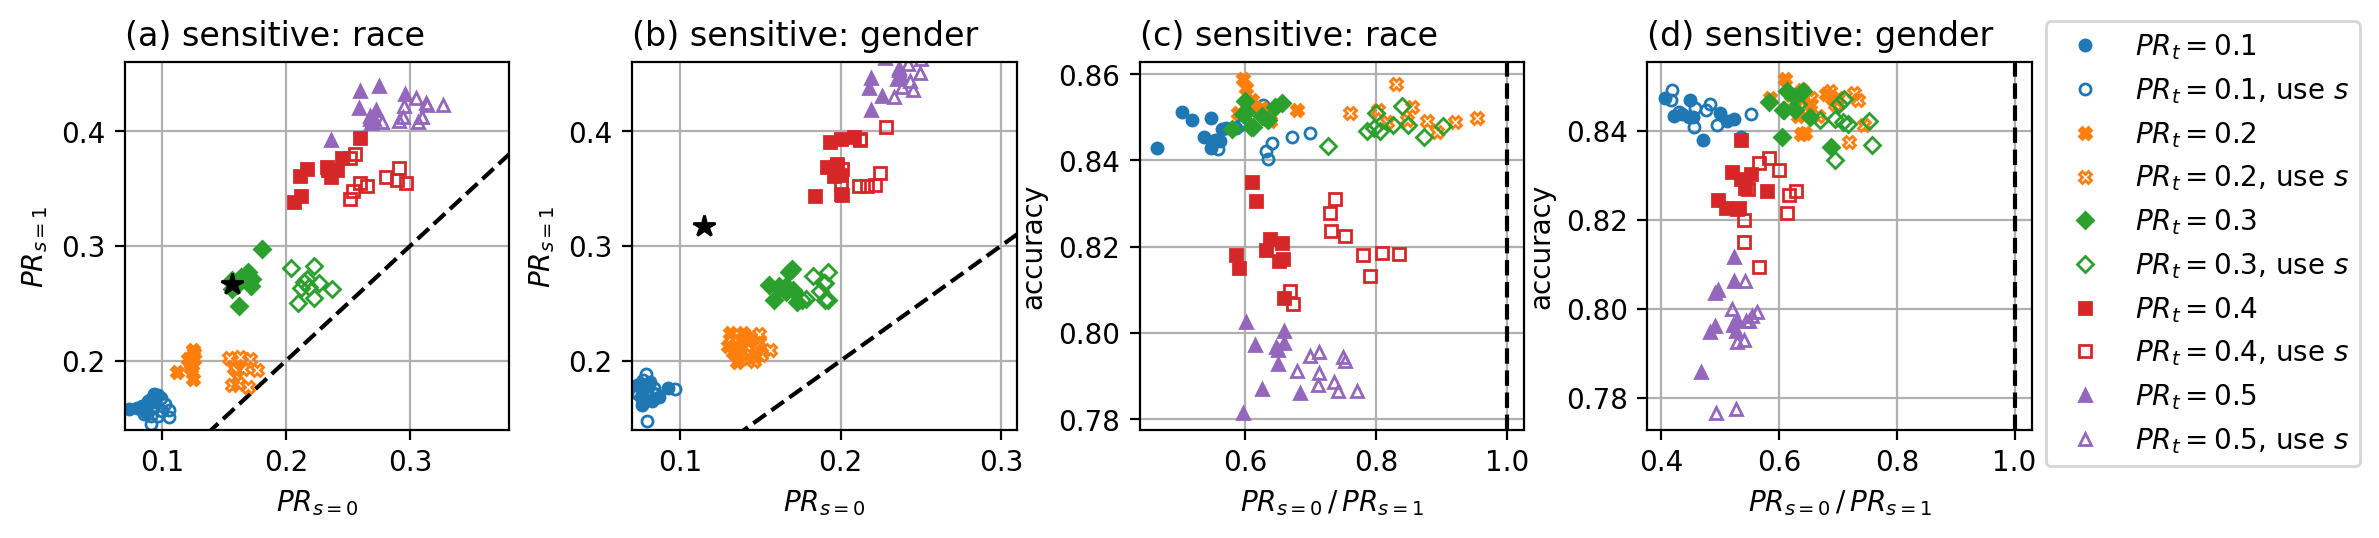

In [23]:
fig